In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
"""# Multivariate gauusian 
mean = np.array([1,1])
cov = np.array([[2,0],[0,2]])
sample_set1 = np.random.multivariate_normal(mean, cov, 10000)

mean = np.array([6,6])
cov = np.array([[2,0],[0,2]])
sample_set2 = np.random.multivariate_normal(mean, cov, 10000)

mean = np.array([6,6])
cov = np.array([[4,0],[0,8]])
sample_set3 = np.random.multivariate_normal(mean, cov, 10000)

# labels
labels = np.array([0]*10000 + [1]*10000)

# case 1
case1_sample_set = np.vstack((sample_set1,sample_set2))

# case 2
case2_sample_set = np.vstack((sample_set1,sample_set3))"""
# INPUT samplefiles
sample_set1 = np.loadtxt("sample_data/output1")
sample_set1.shape
print sample_set1

sample_set2 = np.loadtxt("sample_data/output2")
sample_set2.shape
print sample_set2

sample_set3 = np.loadtxt("sample_data/output3")
sample_set3.shape
print sample_set3

# labels
labels = np.array([0]*10000 + [1]*10000)

# case 1
case1_sample_set = np.vstack((sample_set1,sample_set2))

# case 2
case2_sample_set = np.vstack((sample_set1,sample_set3))

[[ 0.760055  3.71226 ]
 [ 2.11222   1.69318 ]
 [ 1.75915   2.32334 ]
 ..., 
 [ 2.14096   1.40778 ]
 [ 1.55293   0.269544]
 [ 1.19577  -0.769125]]
[[ 5.15655  4.67761]
 [ 6.37895  4.14429]
 [ 2.78185  6.38654]
 ..., 
 [ 5.28296  7.26209]
 [ 2.80914  5.33454]
 [ 7.44466  6.09067]]
[[ 6.03084  4.99675]
 [ 4.37902  8.63585]
 [ 4.17577  5.26781]
 ..., 
 [ 9.34981  5.02345]
 [ 5.87918  4.60314]
 [ 5.91737  4.61226]]


In [14]:
# Case III classifier
# - arbitrary covariance matrix

class QuadraticDiscriminant:
    def __init__(self, mean1, mean2, cov1, cov2, apriori1 = 0.5, apriori2 = 0.5):
        self.mean1 = mean1
        self.mean2 = mean2
        self.cov1 = cov1
        self.cov2 = cov2
        self.apriori1 = apriori1
        self.apriori2 = apriori2
        
        conv1_inv = np.linalg.inv(self.cov1)
        conv2_inv = np.linalg.inv(self.cov2)
        
        self.W1 = -0.5*conv1_inv
        self.W2 = -0.5*conv2_inv
        self.w1 = np.dot(conv1_inv,self.mean1)
        self.w2 = np.dot(conv2_inv,self.mean2)
        
        part11 = -0.5*np.dot(np.dot(self.mean1, conv1_inv),self.mean1)
        part12 = -0.5*np.log(np.linalg.det(conv1_inv))+np.log(self.apriori1)
        self.w10 = part11 + part12
        
        part21 = -0.5*np.dot(np.dot(self.mean2, conv2_inv),self.mean2)
        part22 = -0.5*np.log(np.linalg.det(conv2_inv))+np.log(self.apriori2)
        self.w20 = part21 + part22
        
    def predict(self, X):
        labels = []
        for x in X:
            g1 = np.dot(np.dot(x,self.W1),x)+np.dot(self.w1,x)+self.w10
            g2 = np.dot(np.dot(x,self.W2),x)+np.dot(self.w2,x)+self.w20
            
            if g1 > g2:
                labels.append(0)
            else:
                labels.append(1)
        return np.array(labels)

In [11]:
def calcError(classifier, X, Y):
    # Error calculator for binary classfication
    # calculate the number of misclassified samples separately and in total
    miss_total = 0
    miss_class1 = 0
    miss_class2 = 0
    num_class1 = 0
    num_class2 = 0
    predicted_labels = classifier.predict(X)

    for n in range(Y.size):
        if predicted_labels[n] != Y[n]:
            if Y[n] == 0:
                miss_class1 += 1
            else:
                miss_class2 += 1
        if Y[n] == 0:
            num_class1 += 1
        else:
            num_class2 += 1

    miss_total = miss_class1 + miss_class2

    print "# of miss classifications for class1 = %d, Pr(error) = %.3f" %(miss_class1, miss_class1/float(num_class1))
    print "# of miss classifications for class2 = %d, Pr(error) = %.3f" %(miss_class2, miss_class2/float(num_class2))
    print "# of miss classifications for both   = %d, Pr(error) = %.3f" %(miss_total, miss_total/float(Y.size))

In [12]:
def visualize(classifier, X, Y, ax):
    # Show how points in a grid would be classified
    h = 0.05 # mesh size
    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap='cool')
    
    # Plots the training data
    ax.scatter(X[:,0],  X[:,1], c = Y, cmap='cool')

# 1. Part A 

In [15]:
# make classifier
mean1 = np.array([ 1.00965, 1.04368 ])
mean2 = np.array([ 6.00621, 5.99119 ])
cov1 = np.array([ [ 1.93394, 0.013511 ], [ 0.013511, 2.01761 ] ])
cov2 = np.array([ [ 1.96993, -0.00228491 ], [ -0.00228491, 1.99942 ] ])
classifier1 = QuadraticDiscriminant(mean1, mean2, cov1, cov2)

# calc miss classification
calcError(classifier1, case1_sample_set, labels)


# of miss classifications for class1 = 59, Pr(error) = 0.006
# of miss classifications for class2 = 60, Pr(error) = 0.006
# of miss classifications for both   = 119, Pr(error) = 0.006


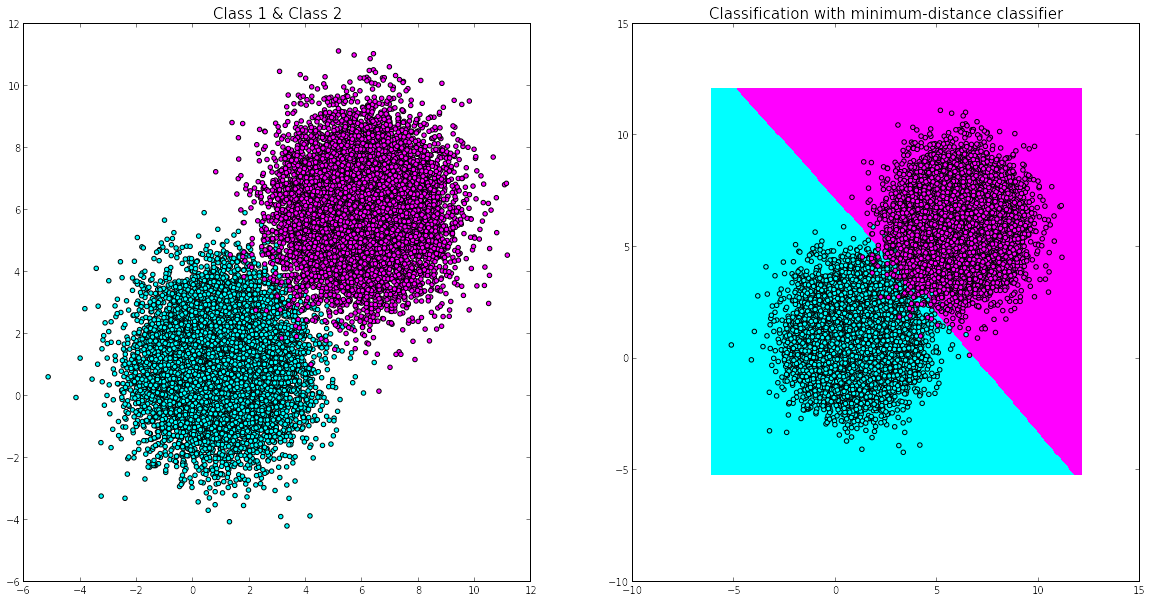

In [16]:
f, axarr = subplots(1, 2,figsize=(20,10))
axarr[0].set_title("Class 1 & Class 2", fontsize=15)
axarr[0].scatter(case1_sample_set[:,0], case1_sample_set[:,1], c=labels, cmap='cool')

axarr[1].set_title("Classification with minimum-distance classifier", fontsize=15)
visualize(classifier1, case1_sample_set, labels, axarr[1])

# 1. Part B 

In [17]:
# make classifier
mean1 = np.array([ 1.01156, 1.11145 ])
mean2 = np.array([ 6.00543, 6.02106 ])
cov1 = np.array([ [ 2.01687, 0.0338156 ], [ 0.0338156, 2.04967 ] ])
cov2 = np.array([ [ 2.00532, -0.01228 ], [ -0.01228, 1.8751 ] ])
classifier2 = QuadraticDiscriminant(mean1, mean2, cov1, cov2)

# calc miss classification
calcError(classifier2, case1_sample_set, labels)

# of miss classifications for class1 = 45, Pr(error) = 0.004
# of miss classifications for class2 = 76, Pr(error) = 0.008
# of miss classifications for both   = 121, Pr(error) = 0.006


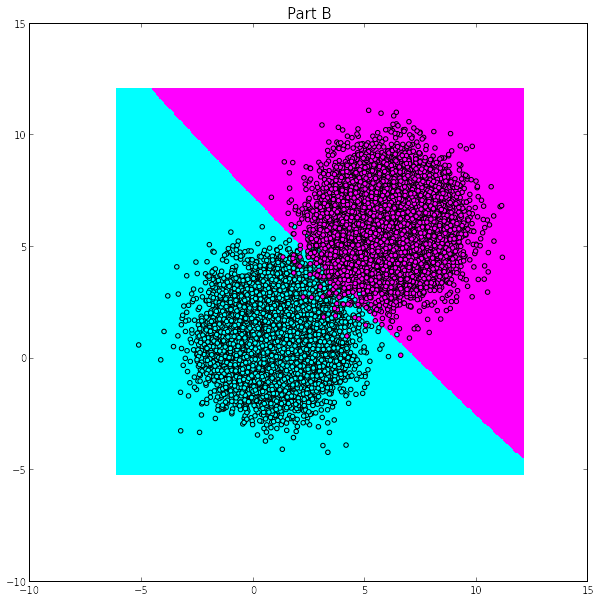

In [18]:
f, ax = subplots(1, 1,figsize=(10,10))
ax.set_title("Part B", fontsize=15)
visualize(classifier2, case1_sample_set, labels, ax)

# 2. Part A

In [23]:
# make classifier 
mean1 = np.array([ 1.00965, 1.04368 ])
mean2 = np.array([ 6.01294, 6.02544 ])
cov1 = np.array([ [ 1.93394, 0.013511 ], [ 0.013511, 2.01761 ] ])
cov2 = np.array([ [ 3.89307, -0.00278576 ], [ -0.00278576, 7.97445 ] ])

classifier1 = QuadraticDiscriminant(mean1, mean2, cov1, cov2)

# calc miss classification
calcError(classifier1, case2_sample_set, labels)

# of miss classifications for class1 = 777, Pr(error) = 0.078
# of miss classifications for class2 = 116, Pr(error) = 0.012
# of miss classifications for both   = 893, Pr(error) = 0.045


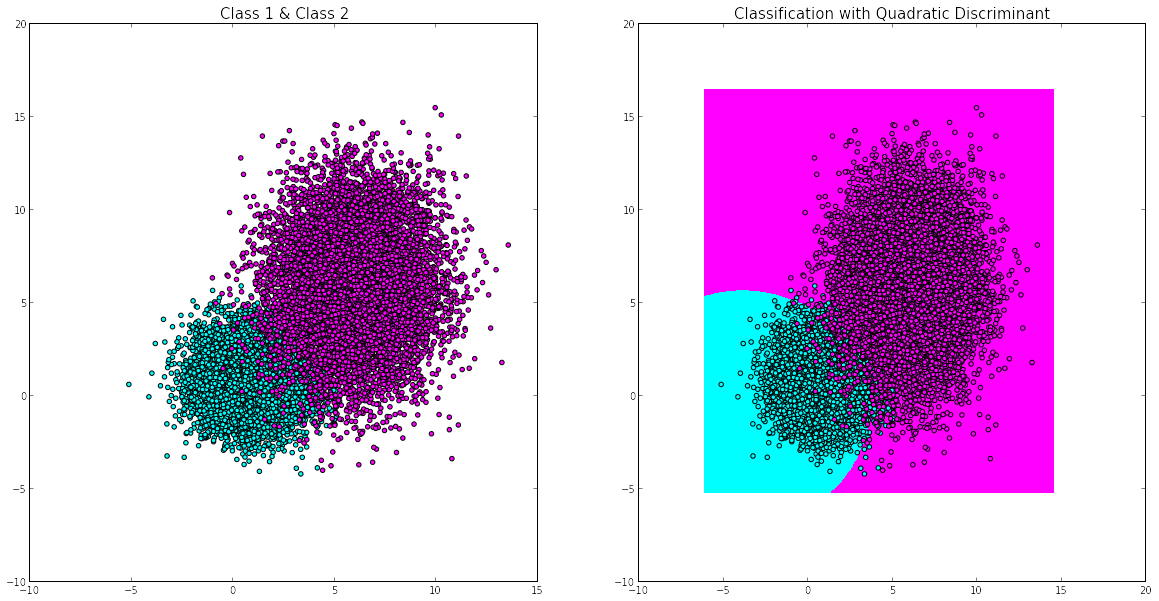

In [21]:
# plot
f, axarr = subplots(1, 2,figsize=(20, 10))
axarr[0].set_title("Class 1 & Class 2", fontsize=15)
axarr[0].scatter(case2_sample_set[:,0], case2_sample_set[:,1], c=labels, cmap='cool')

axarr[1].set_title("Classification with Quadratic Discriminant", fontsize=15)
visualize(classifier1, case2_sample_set, labels, axarr[1])

# 2. Part B

In [22]:
# classification
mean1 = np.array([ 1.07234, 1.02928 ])
mean2 = np.array([ 6.06382, 5.96017 ])
cov1 = np.array([ [ 1.95947, -0.0418238 ], [ -0.0418238, 1.96188 ] ])
cov2 = np.array([ [ 4.16473, 0.015205 ], [ 0.015205, 7.31725 ] ])

classifier2 = QuadraticDiscriminant(mean1, mean2, cov1, cov2)

# calc miss classification
calcError(classifier2, case2_sample_set, labels)

# of miss classifications for class1 = 758, Pr(error) = 0.076
# of miss classifications for class2 = 116, Pr(error) = 0.012
# of miss classifications for both   = 874, Pr(error) = 0.044


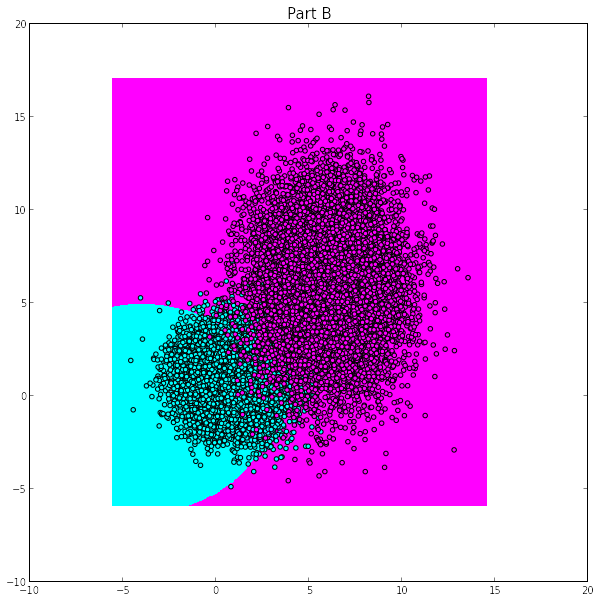

In [418]:
# plot
f, ax = subplots(figsize=(10,10))
ax.set_title("Part B", fontsize=15)
ax.scatter(case2_sample_set[:,0], case2_sample_set[:,1], c=labels, cmap='cool')
visualize(classifier2, case2_sample_set, labels, ax)

# 3A.

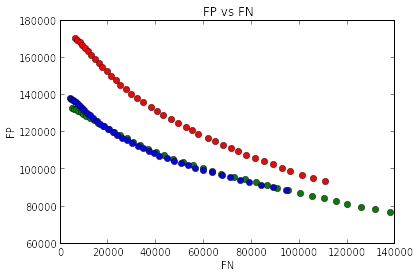

In [95]:
case1 =  np.loadtxt("Data_Prog2/errors1a.txt")
case2 =  np.loadtxt("Data_Prog2/errors2a.txt")
case3 =  np.loadtxt("Data_Prog2/errors3a.txt")
title("FP vs FN")
xlabel("FN")
ylabel("FP")
plot(case1[:,0],case1[:,1], 'or')
plot(case2[:,0],case2[:,1], 'og')
plot(case3[:,0],case3[:,1], 'ob')

# 3B.

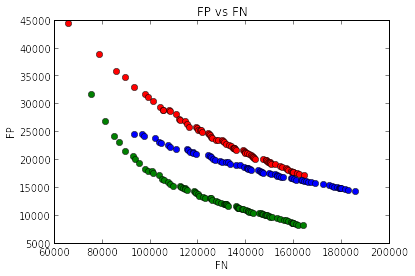

In [83]:
case1 =  np.loadtxt("Data_Prog2/errors1.txt")
case2 =  np.loadtxt("Data_Prog2/errors2.txt")
case3 =  np.loadtxt("Data_Prog2/errors3.txt")
title("FP vs FN")
xlabel("FN")
ylabel("FP")
plot(case1[:,0],case1[:,1], 'or')
plot(case2[:,0],case2[:,1], 'og')
plot(case3[:,0],case3[:,1], 'ob')